In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the CSV file
df = pd.read_csv("../data/data.csv")

# Group the data by customer ID
grouped_data = df.groupby('CustomerId')

In [5]:
df['TransactionId'] = df['TransactionId'].str.extract('(\d+)') # Extract only numeric part
df['BatchId'] = df['BatchId'].str.extract('(\d+)') # Extract only numeric part
df['AccountId'] = df['AccountId'].str.extract('(\d+)') # Extract only numeric part
df['SubscriptionId'] = df['SubscriptionId'].str.extract('(\d+)') # Extract only numeric part
df['CustomerId'] = df['CustomerId'].str.extract('(\d+)') # Extract only numeric part
df['ProviderId'] = df['ProviderId'].str.extract('(\d+)') # Extract only numeric part
df['ProductId'] = df['ProductId'].str.extract('(\d+)') # Extract only numeric part
df['ChannelId'] = df['ChannelId'].str.extract('(\d+)') # Extract only numeric part


In [6]:
# Create aggregate features
aggregate_df = df.groupby('CustomerId').agg({
    'Value': ['sum', 'mean', 'count', 'std']
})

In [7]:
# Rename the columns
aggregate_df.columns = ['Total Transaction Value', 'Average Transaction Value', 'Transaction Count', 'Standard Deviation of Transaction Values']

# Fill NaN values with 0
aggregate_df['Standard Deviation of Transaction Values'] = aggregate_df['Standard Deviation of Transaction Values'].fillna(0)


In [8]:
# Display the aggregate features
aggregate_df

,Total Transaction Value,Average Transaction Value,Transaction Count,Standard Deviation of Transaction Values
CustomerId,,,,
1,10000,10000.000000,1,0.000000
10,10000,10000.000000,1,0.000000
1001,30400,6080.000000,5,4100.243895
1002,4775,434.090909,11,518.805446
1003,32000,5333.333333,6,3945.461528
...,...,...,...,...
992,32000,5333.333333,6,4033.195590
993,32000,6400.000000,5,3781.534080
994,614077,6079.970297,101,14537.733039


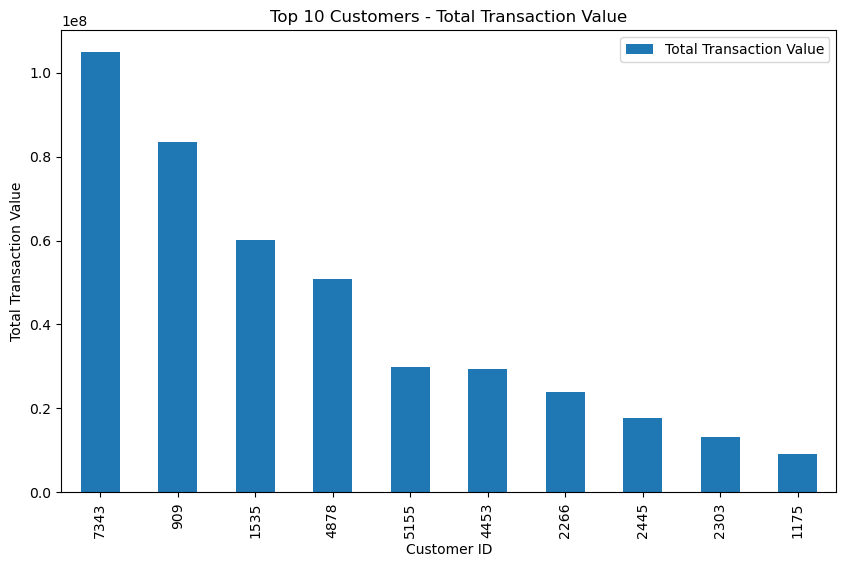

In [9]:
# Plotting the top 10 customers with the highest Total Transaction Value
top_10_total_value = aggregate_df.nlargest(10, 'Total Transaction Value')
top_10_total_value.plot(kind='bar', y='Total Transaction Value', figsize=(10, 6))
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Value')
plt.title('Top 10 Customers - Total Transaction Value')
plt.show()


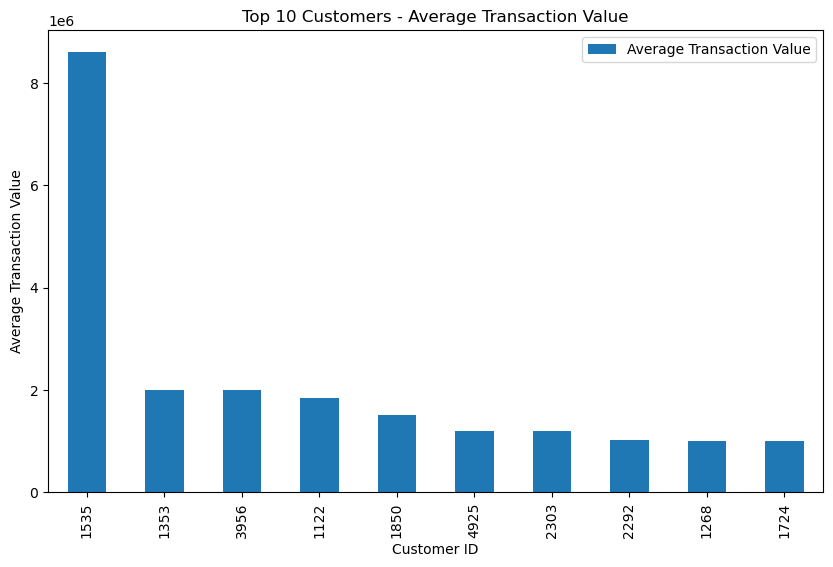

In [10]:
# Plotting the top 10 customers with the highest Average Transaction Value
top_10_average_value = aggregate_df.nlargest(10, 'Average Transaction Value')
top_10_average_value.plot(kind='bar', y='Average Transaction Value', figsize=(10, 6))
plt.xlabel('Customer ID')
plt.ylabel('Average Transaction Value')
plt.title('Top 10 Customers - Average Transaction Value')
plt.show()

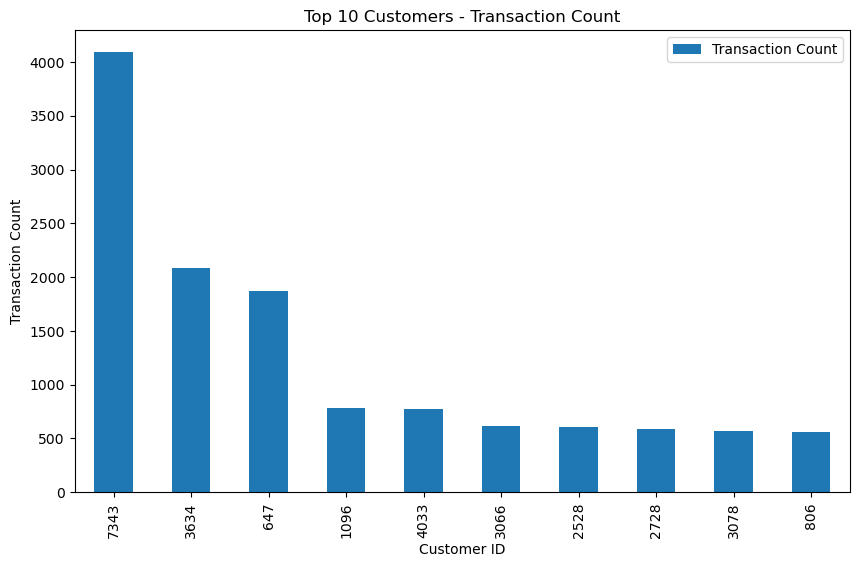

In [11]:
# Plotting the top 10 customers with the highest Transaction Count
top_10_transaction_count = aggregate_df.nlargest(10, 'Transaction Count')
top_10_transaction_count.plot(kind='bar', y='Transaction Count', figsize=(10, 6))
plt.xlabel('Customer ID')
plt.ylabel('Transaction Count')
plt.title('Top 10 Customers - Transaction Count')
plt.show()


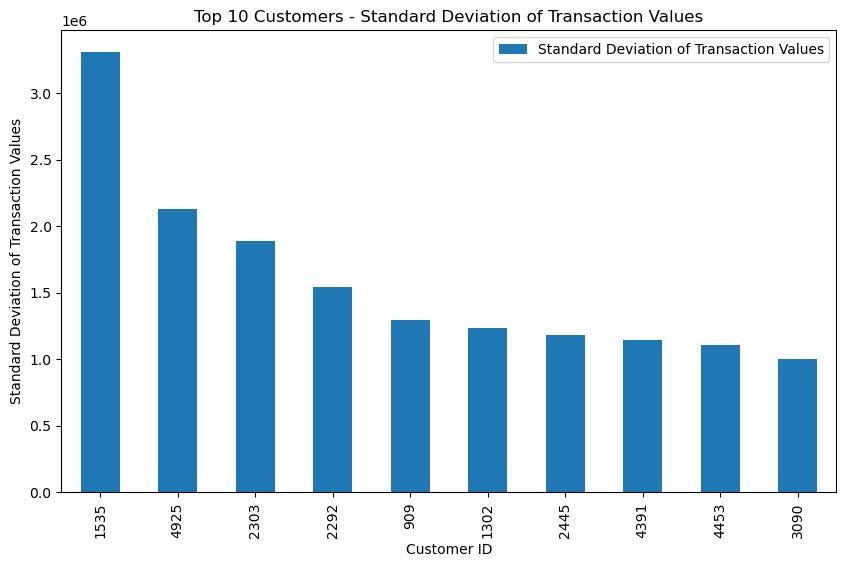

In [12]:
# Plotting the top 10 customers with the highest Standard Deviation of Transaction Values
top_10_std_dev = aggregate_df.nlargest(10, 'Standard Deviation of Transaction Values')
top_10_std_dev.plot(kind='bar', y='Standard Deviation of Transaction Values', figsize=(10, 6))
plt.xlabel('Customer ID')
plt.ylabel('Standard Deviation of Transaction Values')
plt.title('Top 10 Customers - Standard Deviation of Transaction Values')
plt.show()